In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sample_pole = cv2.imread('../data/tests/sample_pole.png')
sample_midspan = cv2.imread('../data/tests/sample_midspan.png')
sample_stick_calibrations = pd.read_json('../data/tests/sample_stick_calibrations.json')
sample_cable_calibrations = pd.read_csv('../data/tests/sample_cable_calibrations.csv')
green = (0, 255, 0)
red = (0, 0, 255)

# Goal 4: Verification of Pole and Cable Heights

## 2.1: Objectives and Process Methodology

### 4.1.1: Calculate Pole and Cable Heights via Photogrammetry

In [11]:
sample_stick_calibrations

base_feet  base_pixels        coords               image  index  \
0         0.0         3644  [1405, 3644]     sample_pole.png      0   
1         2.5         3422  [1405, 3422]     sample_pole.png      1   
10       10.5         2653  [1340, 2653]  sample_midspan.png      3   
11       14.5         2304  [1351, 2304]  sample_midspan.png      4   
12       16.5         2132  [1357, 2132]  sample_midspan.png      5   
13       17.0         2089  [1357, 2089]  sample_midspan.png      6   
2         6.5         3057  [1394, 3057]     sample_pole.png      2   
3        10.5         2699  [1384, 2699]     sample_pole.png      3   
4        14.5         2347  [1378, 2347]     sample_pole.png      4   
5        16.5         2174  [1376, 2174]     sample_pole.png      5   
6        17.0         2130  [1376, 2130]     sample_pole.png      6   
7         0.0         3576  [1329, 3576]  sample_midspan.png      0   
8         2.5         3358  [1329, 3358]  sample_midspan.png      1   
9         6.5         3004  [1334, 3004]  sample_midspan.png      2   

    pixels_per_foot  point_order  
0        -89.142857            0  
1        -89.142857            1  
10       -87.571429            3  
11       -87.571429            4  
12       -87.571429            5  
13       -87.571429            6  
2        -89.142857            2  
3        -89.142857            3  
4        -89.142857            4  
5        -89.142857            5  
6        -89.142857            6  
7        -87.571429            0  
8        -87.571429            1  
9        -87.571429            2

In [12]:
pole_stick_calibrations = sample_stick_calibrations[sample_stick_calibrations['image'] == 'sample_pole.png'].to_dict(orient='index')
pole_stick_calibrations

{0: {'base_feet': 0.0,
  'base_pixels': 3644,
  'coords': [1405, 3644],
  'image': 'sample_pole.png',
  'index': 0,
  'pixels_per_foot': -89.1428571429,
  'point_order': 0},
 1: {'base_feet': 2.5,
  'base_pixels': 3422,
  'coords': [1405, 3422],
  'image': 'sample_pole.png',
  'index': 1,
  'pixels_per_foot': -89.1428571429,
  'point_order': 1},
 2: {'base_feet': 6.5,
  'base_pixels': 3057,
  'coords': [1394, 3057],
  'image': 'sample_pole.png',
  'index': 2,
  'pixels_per_foot': -89.1428571429,
  'point_order': 2},
 3: {'base_feet': 10.5,
  'base_pixels': 2699,
  'coords': [1384, 2699],
  'image': 'sample_pole.png',
  'index': 3,
  'pixels_per_foot': -89.1428571429,
  'point_order': 3},
 4: {'base_feet': 14.5,
  'base_pixels': 2347,
  'coords': [1378, 2347],
  'image': 'sample_pole.png',
  'index': 4,
  'pixels_per_foot': -89.1428571429,
  'point_order': 4},
 5: {'base_feet': 16.5,
  'base_pixels': 2174,
  'coords': [1376, 2174],
  'image': 'sample_pole.png',
  'index': 5,
  'pixels_p

In [13]:
midspan_stick_calibrations = sample_stick_calibrations[sample_stick_calibrations['image'] == 'sample_midspan.png'].to_dict(orient='index')
midspan_stick_calibrations

{7: {'base_feet': 0.0,
  'base_pixels': 3576,
  'coords': [1329, 3576],
  'image': 'sample_midspan.png',
  'index': 0,
  'pixels_per_foot': -87.5714285714,
  'point_order': 0},
 8: {'base_feet': 2.5,
  'base_pixels': 3358,
  'coords': [1329, 3358],
  'image': 'sample_midspan.png',
  'index': 1,
  'pixels_per_foot': -87.5714285714,
  'point_order': 1},
 9: {'base_feet': 6.5,
  'base_pixels': 3004,
  'coords': [1334, 3004],
  'image': 'sample_midspan.png',
  'index': 2,
  'pixels_per_foot': -87.5714285714,
  'point_order': 2},
 10: {'base_feet': 10.5,
  'base_pixels': 2653,
  'coords': [1340, 2653],
  'image': 'sample_midspan.png',
  'index': 3,
  'pixels_per_foot': -87.5714285714,
  'point_order': 3},
 11: {'base_feet': 14.5,
  'base_pixels': 2304,
  'coords': [1351, 2304],
  'image': 'sample_midspan.png',
  'index': 4,
  'pixels_per_foot': -87.5714285714,
  'point_order': 4},
 12: {'base_feet': 16.5,
  'base_pixels': 2132,
  'coords': [1357, 2132],
  'image': 'sample_midspan.png',
  'i

In [14]:
sample_cable_calibrations

image     x     y
0      sample_pole.png  1387  2044
1      sample_pole.png  1387  1919
2      sample_pole.png  1387  1789
3      sample_pole.png  1387  1744
4      sample_pole.png  1387  1683
5   sample_midspan.png  1359  2021
6   sample_midspan.png  1359  1965
7   sample_midspan.png  1359  1927
8   sample_midspan.png  1359  1841
9   sample_midspan.png  1359  1729
10  sample_midspan.png  1359  1529
11  sample_midspan.png  1359  1543

In [15]:
pole_cable_calibrations = sample_cable_calibrations[sample_cable_calibrations['image'] == 'sample_pole.png'].to_dict(orient='index')
pole_cable_calibrations

{0: {'image': 'sample_pole.png', 'x': 1387, 'y': 2044},
 1: {'image': 'sample_pole.png', 'x': 1387, 'y': 1919},
 2: {'image': 'sample_pole.png', 'x': 1387, 'y': 1789},
 3: {'image': 'sample_pole.png', 'x': 1387, 'y': 1744},
 4: {'image': 'sample_pole.png', 'x': 1387, 'y': 1683}}

In [16]:
midspan_cable_calibrations = sample_cable_calibrations[sample_cable_calibrations['image'] == 'sample_midspan.png'].to_dict(orient='index')
midspan_cable_calibrations

{5: {'image': 'sample_midspan.png', 'x': 1359, 'y': 2021},
 6: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1965},
 7: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1927},
 8: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1841},
 9: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1729},
 10: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1529},
 11: {'image': 'sample_midspan.png', 'x': 1359, 'y': 1543}}

2044 -89.1428571429 2130
1919 -89.1428571429 2130
1789 -89.1428571429 2130
1744 -89.1428571429 2130
1683 -89.1428571429 2130
2021 -89.1428571429 2130
1965 -89.1428571429 2130
1927 -89.1428571429 2130
1841 -89.1428571429 2130
1729 -89.1428571429 2130
1529 -89.1428571429 2130
1543 -89.1428571429 2130


/Users/eronlloyd/anaconda/envs/datasci/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


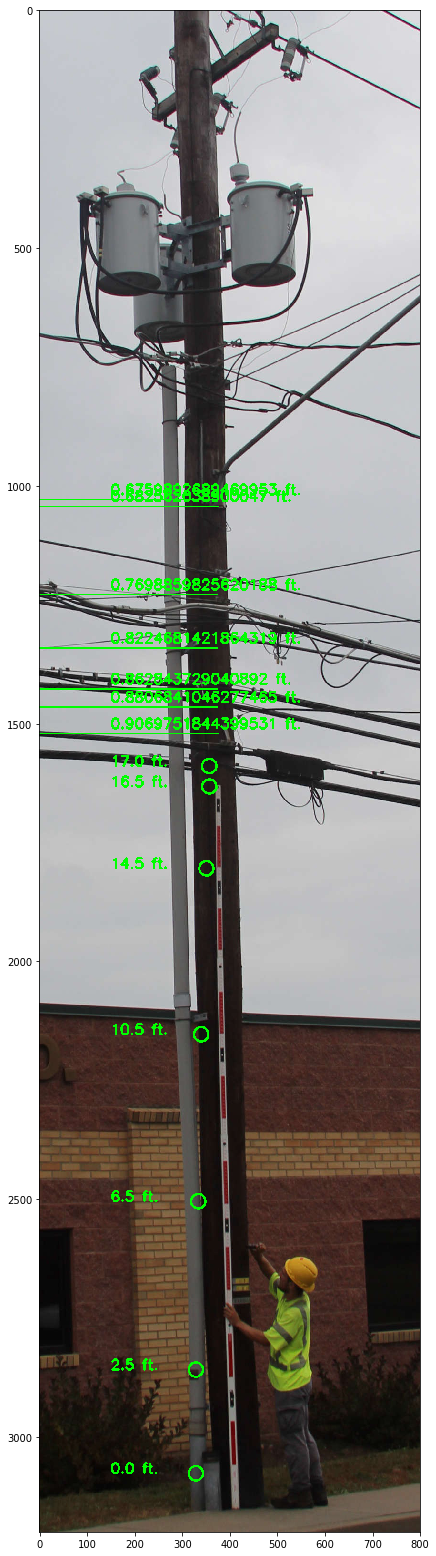

In [20]:
fig = plt.figure(figsize=(15, 30))
columns = 2
rows = 1

green = (0, 255, 0)

def pixels_to_feet(base_pixels, stick_top_pixels, pole_stick_ppf):
    print(base_pixels, stick_top_pixels, pole_stick_ppf)
    return ((base_pixels + stick_top_pixels) / pole_stick_ppf)

pole_measured = sample_pole.copy()
pole_height, pole_width = pole_measured.shape[:2]
global pole_stick_ppf
global pole_stick_top_pixels
global midspan_stick_ppf
global midspan_stick_top_pixels
for measures in pole_stick_calibrations.values():
#     print(measures)
    cv2.circle(pole_measured, tuple(measures['coords']), 15, green, 3)
    cv2.putText(pole_measured, str("{} ft.".format(measures['base_feet'])),
                (1150, measures['base_pixels']), cv2.FONT_HERSHEY_SIMPLEX, 1.0, green, 4)
    if measures['base_feet'] == 17.0:
        pole_stick_ppf = measures['pixels_per_foot']
        pole_stick_top_pixels = measures['base_pixels']
for measures in pole_cable_calibrations.values():    
    cv2.line(pole_measured, (0, measures['y']), (1375, measures['y']), green, 2)
    feet_height = pixels_to_feet(measures['y'], pole_stick_ppf, pole_stick_top_pixels)
    cv2.putText(pole_measured, str("{} ft.".format(feet_height)),
                (1150, measures['y'] - 11), cv2.FONT_HERSHEY_SIMPLEX, 1.0, green, 4)
pole_measured_cropped = pole_measured[500:3700, 1000:1800]
fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(pole_measured_cropped, cv2.COLOR_BGR2RGB))

midspan_measured = sample_pole.copy()
pole_height, pole_width = midspan_measured.shape[:2]
global midspan_stick_ppf
global midspan_stick_top_pixels
for measures in midspan_stick_calibrations.values():
#     print(measures)
    cv2.circle(midspan_measured, tuple(measures['coords']), 15, green, 3)
    cv2.putText(midspan_measured, str("{} ft.".format(measures['base_feet'])),
                (1150, measures['base_pixels']), cv2.FONT_HERSHEY_SIMPLEX, 1.0, green, 4)
    if measures['base_feet'] == 17.0:
        midspan_stick_ppf = measures['pixels_per_foot']
        midspan_stick_top_pixels = measures['base_pixels']
for measures in midspan_cable_calibrations.values():    
    cv2.line(midspan_measured, (0, measures['y']), (1375, measures['y']), green, 2)
    feet_height = pixels_to_feet(measures['y'], pole_stick_ppf, pole_stick_top_pixels)
    cv2.putText(midspan_measured, str("{} ft.".format(feet_height)),
                (1150, measures['y'] - 11), cv2.FONT_HERSHEY_SIMPLEX, 1.0, green, 4)
midspan_measured_cropped = midspan_measured[500:3700, 1000:1800]
fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(midspan_measured_cropped, cv2.COLOR_BGR2RGB))

plt.show()

### 4.1.2: Verify Calculated Heights with Statistical Analysis

## 4.2: Desired Outcome